# Optimización

## ¿Qué es un problema de optimización?
El objetivo de la optimización es encontrar la mejor solución para un problema de un amplio conjunto de soluciones posibles.

Este es un problema de **optimización** típico. Esencialmente al ejercicio en el que obtenemos los mejores valores para `maximizar`/`minimizar` una función objetivo dados (o no) una serie de condicionantes.

Supongamos que una empresa de transporte entrega paquetes a sus clientes mediante una flota de camiones. Todos los días, la empresa debe asignar paquetes a los camiones y, luego, elegir una ruta para que cada camión entregue los paquetes. Cada asignación posible de paquetes y rutas tiene un coste, según la distancia total de viaje de los camiones y posiblemente otros factores. El problema es elegir las asignaciones de paquetes y rutas que tienen el menor costo.

Como todos los problemas de optimización, este tiene los siguientes elementos:

* **El objetivo**: la cantidad que deseas optimizar. En el ejemplo anterior, el objetivo es minimizar el costo. Para configurar un problema de optimización, debes definir una función que calcule el valor del objetivo para cualquier solución posible. Esto se denomina función objetivo. En el ejemplo anterior, la función objetiva calcularía el costo total de cualquier asignación de paquetes y rutas.

Una solución óptima es aquella para la que el valor de la función objetiva es el mejor. ("Muy bueno" puede ser un máximo o un mínimo).

* **Las restricciones**: restricciones sobre el conjunto de soluciones posibles, según los requisitos específicos del problema. Por ejemplo, si la empresa de transporte no puede asignar paquetes superiores a un peso determinado a los camiones, esto impone una restricción para las soluciones.

Una solución posible es aquella que cumple con todas las restricciones determinadas para el problema, sin ser óptima. Pero en caso de existir, nos gustaría encontrar la solución que ofrece el valor `maximo`/`mínimo` a nuestro objetivo.

Formalmente solemos plantearlo de la siguiente manera:

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & f_0(x) \\
& \text{subject to}
& & f_i(x) \leq b_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

De modo que $f_0$ será aquella relación de las variables $x$ de las que queremos sacar el máximo provecho y $f_i$ serán las restricciones que deberemos cumplir.

### Programación lineal

La [programación lineal](http://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal) estudia las situaciones en las que se exige maximizar o minimizar funciones que se encuentran sujetas a determinadas restricciones cuando todas estas corresponden a una relación lineal ($c_ix_i$).

Consiste en optimizar (minimizar o maximizar) una función lineal, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones que expresamos mediante un [sistema de inecuaciones lineales](http://es.wikipedia.org/wiki/Inecuaci%C3%B3n#Sistema_de_inecuaciones).

Para resolver un problema de programación lineal, debemos seguir los siguientes pasos:

1. Elegir las incógnitas.

2. Escribir la función objetivo en función de los datos del problema.

3. Escribir las restricciones en forma de sistema de inecuaciones.

4. Averiguar el conjunto de soluciones factibles representando gráficamente las restricciones.

5. Calcular las coordenadas de los vértices del recinto de soluciones factibles (si son pocos).

6. Calcular el valor de la función objetivo en cada uno de los vértices para ver en cuál de ellos presenta el valor máximo o mínimo según nos pida el problema (hay que tener en cuenta aquí la posible no existencia de solución).

Veamos un ejemplo y como [Python](http://python.org/) nos ayuda a resolverlo en forma sencilla.

#### Ejemplo

Digamos que trabajamos para una empresa que fabrica diferentes productos. Para cada producto disponemos de una producción $x_i$ donde $i$ indica el producto que fabricamos cada día. Queremos saber cual es la producción optima de productos de cara a maximizar el beneficio diario teniendo en cuenta que: 

* El beneficio de fabricación por producto es $20, $12, $40, y $25 para los productos 1,2,3 y 4 respectivamente.
* Debido a los empleados diarios y otras restricciones de almacén no podemos producir más de 50 unidades cada día.
* Cada unidad del primer producto ($x_1$) consume 3 unidades de la materia base $A$.
* Cada unidad del segundo producto ($x_2$) consume 2 unidades de la materia base $A$ y una unidad del meterial $B$.
* Cada unidad del tercer producto ($x_3$) consume 1 unidad de la materia base $A$ y 2 unidades del meterial $B$.
* Cada unidad del cuarto producto ($x_4$) consume 3 unidades del meterial $B$.
* Cada día se disponen como mucho de 100 unidades de la materia prima $A$ y 90 de la $B$.

Esto nos dejaría una formulación del problema como la siguiente:

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{maximize}}
& 20x_1 + 12x_2 + 40x_3 + 25x_4 \\
& \text{subject to}
& \sum_i x_i \le 50 \\
& & 3x_1 + 2x_2 + x_3 \le 100 \\
& & x_2 + 2x_3 + 3x_4 \le 90 \\
& & \forall i, x_i \geq 0
\end{aligned}
\end{equation*}
$$

Deberemos disponer de algún método capaz de arrojar potenciales soluciones para nuestras incógnitas y que basado en el valor de la función objetivo podamos estimar cada vez mejores soluciones a nuestro problema. 

Uno de los métodos clásicos a la hora de implementar estas operaciones es el [método simplex](https://es.wikipedia.org/wiki/Algoritmo_s%C3%ADmplex). Gracias a la comunidad open source disponemos de multitud de herramientas que ya lo implementan de manera que solo deberemos saber cómo expresar nuestro problema.

Algunas librerías utilizadas son:

* [SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.html)
* [PuLP](https://www.coin-or.org/PuLP/solvers.html)
* [CVXOPT](https://cvxopt.org/userguide/coneprog.html#optional-solvers)

Muchas de las soluciones trabajan con funciones de minimización que únicamente requiere cambiar la función objetivo en nuestro caso:

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& -20x_1 - 12x_2 - 40x_3 - 25x_4 \\
& \text{subject to}
& \sum_i x_i \le 50 \\
& & 3x_1 + 2x_2 + x_3 \le 100 \\
& & x_2 + 2x_3 + 3x_4 \le 90 \\
& & \forall i, x_i \geq 0
\end{aligned}
\end{equation*}
$$

In [2]:
# Coeficientes de cada una de las variables a determinar
# multiplicados por -1 para cambiar la dirección
obj = [-20, -12, -40, -25]

Si planteamos las restricciones como operaciones matriciales...

$$
\begin{bmatrix}
1 & 1 & 1 & 1 \\
3 & 2 & 1 & 0 \\
0 & 1 & 2 & 3 \\ 
\end{bmatrix}

\begin{bmatrix}
x_1 & \\
x_2 & \\
x_3 & \\
x_4 
\end{bmatrix} 
\le 
\begin{bmatrix}
50 & \\
100 & \\
90
\end{bmatrix}$$

$$

In [3]:
lhs_ineq = [[1, 1, 1, 1],  # Capacidad
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Capacidad
            100,  # Material A
             90]  # Material B

In [4]:
from scipy.optimize import linprog

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="highs") # simplex va a ser deprecado en favor de Highs
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1900.0
              x: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
            nit: 4
          lower:  residual: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
                 marginals: [ 0.000e+00  1.800e+01  0.000e+00  2.500e+01]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  4.000e+01  0.000e+00]
                 marginals: [-2.000e+01 -0.000e+00 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

De modo que nuestra fabricación óptima debería ser la siguiente

In [5]:
opt.x

array([ 5.,  0., 45.,  0.])

¿Qué pasa si fabricamos todo del tercer producto? Debería darnos más beneficio ¿no?

In [6]:
import numpy as np

nuestra_solución = [0, 0, 50, 0]
restricciones = np.dot(lhs_ineq, nuestra_solución)

restricciones <= rhs_ineq

array([ True,  True, False])

In [7]:
restricciones

array([ 50,  50, 100])

No podríamos cumplir con la fabricación dado que no dispondríamos de las 100 unidades de material $B$ necesario y acumularíamos más stock del material $A$ a la larga.

In [8]:
restricciones = np.dot(lhs_ineq, opt.x)

restricciones <= rhs_ineq

array([ True,  True,  True])

In [9]:
restricciones

array([50., 60., 90.])

Es un uso más eficiente de los recursos a corto medio plazo. Pensad que en una fábrica deberíamos resolver este problema con un carácter diario y teniendo en cuenta los cambios de stock intradía. Por ejemplo, para el siguiente día al primero nuestros stock de material varía con lo que deberemos modificar el pedido de material $A$ a únicamente 40 piezas ya que no podremos almacenar más debido al stock del día anterior.

## Más allá de lo lineal

Veremos que este es un caso sencillo, pero en base a cómo varían nuestros parámetros nos enfrentaremos a distintos problemas:

* Si la función es no-lineal: `abs`, `x**2`, `x*y`
* Si las variables son continuas, discretas o binarias
* Si nuestro problema muestra convexidad
* Si no conocemos la relación entre las variables pero disponemos de observaciones: datos

Veamos un ejemplo de función no lineal:

$$

f(x) = 3x^4 - 2x + 1

$$

In [10]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return 3 * x ** 4 - 2 * x + 1

res = minimize_scalar(objective_function)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.5503212087491959
     nit: 12
    nfev: 15

<img src="./img/curve.png" alt="drawing" width="600"/>

Veamos que sucede con una función que supone otros retos.

$$

f(x) = x^4-x^2

$$

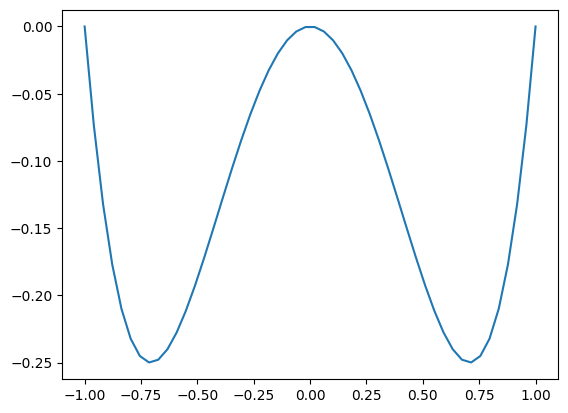

In [11]:
import matplotlib.pyplot as plt

def objective_function(x):
    return x ** 4 - x ** 2

# Valores en el rango de interés
x_vals = np.linspace(-1, 1)
y_vals = [objective_function(x) for x in x_vals]

plt.plot(x_vals, y_vals);

In [12]:
res = minimize_scalar(objective_function)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999994
       x: 0.7071067853059209
     nit: 11
    nfev: 14

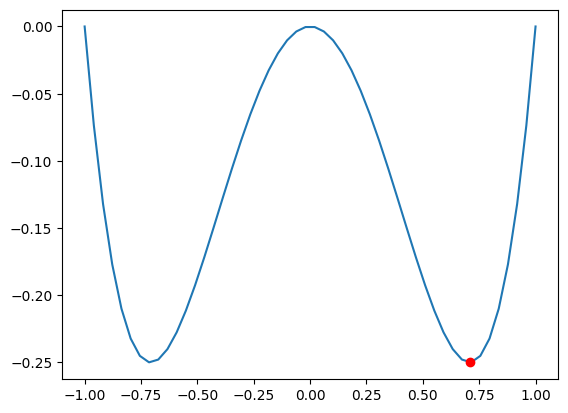

In [13]:
plt.plot(x_vals, y_vals)
plt.plot(res.x, objective_function(res.x), 'ro');

## Gradientes

Es habitual que emplees el nivel de cambio en cada puno (gradiente) como guía para saber hacia dónde debe variar nuestra estimación inicial. Existen dos grandes grupos de métodos cuando nos enfrentamos a modelos no-lineales.

* Basados en gradiente
* No basado en gradiente

El basado en gradiente nos obliga a disponer o encontrar el modo de emular la derivada de nuestra función objetivo:

$$

    f^{'}(x) = \frac{d}{dx}f(x) = 4x^3 - 2x

$$

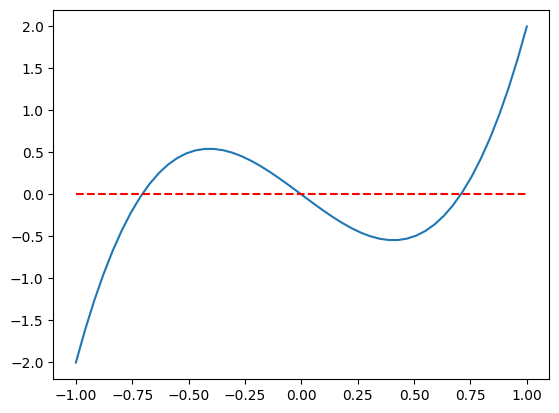

In [14]:
def dev_objective_function(x):
    """
    Derivada de la función objetivo x^4 - x^2
    """
    return 4*x**3 - 2*x

# Valores en el rango de interés
x_vals = np.linspace(-1, 1)
y_vals = [dev_objective_function(x) for x in x_vals]

plt.plot(x_vals, y_vals)
plt.plot(x_vals, np.zeros(len(x_vals)), 'r--');

El método de descenso del gradiente nos permite obtener una guía de hacia dónde podemos ir variando nuestros valores para así poder obtener un resultado en los óptimos locales o globales que encontremos.

In [15]:
import time
from IPython import display
%matplotlib inline

# Valores en el rango de interés
x_vals = np.linspace(-1, 1)
y_vals = [objective_function(x) for x in x_vals]

def gradient_descent(gradient, inicio, ratio_aprendizaje, n_iter):
    optimo = inicio
    for _ in range(n_iter):
        diff = -ratio_aprendizaje * gradient(optimo)
        optimo += diff

        plt.plot(x_vals, y_vals, 'b-')
        plt.plot(optimo, objective_function(optimo), 'ro')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)        
    return optimo

Necesitamos tres valores que condicionan en gran medida el resultado obtenido:

* El punto de inicio: también llamado $x_0$
* La tasa de aprendizaje: cuanto nos fiamos de la dirección indicada para la mejora
* Un número máximo de iteraciones

0.7632038892313394

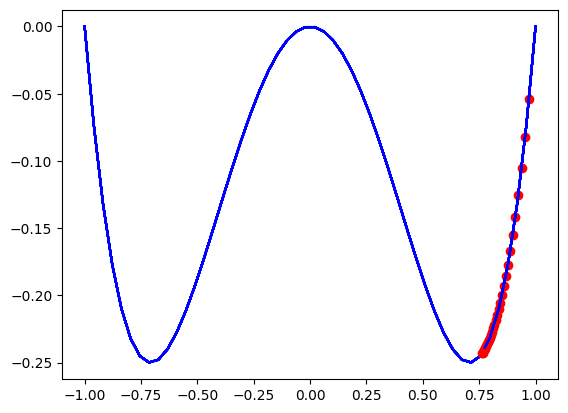

In [16]:
gradient_descent(dev_objective_function, 0.99, 0.01, 30)

-0.9577451429268296

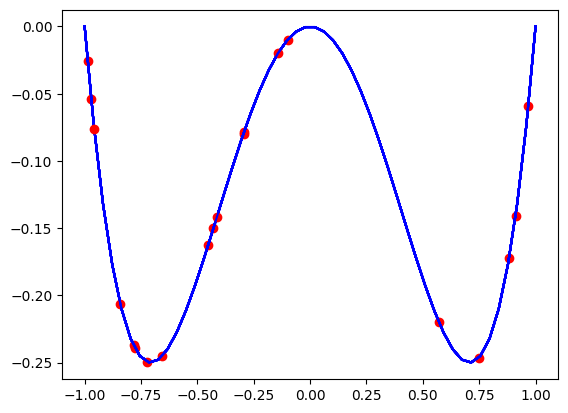

In [17]:
gradient_descent(dev_objective_function, -0.99, 1.0, 20)

0.0

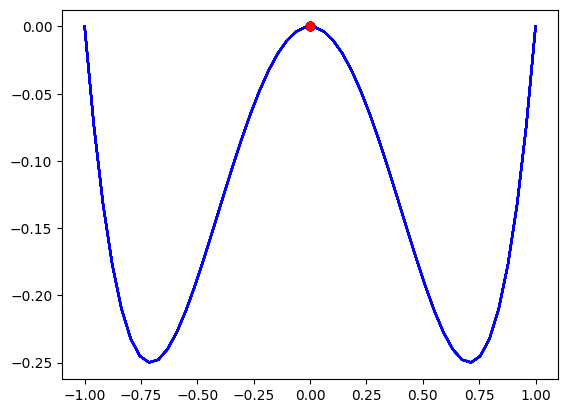

In [18]:
gradient_descent(dev_objective_function, 0.0, 0.1, 20)

0.7071109202509221

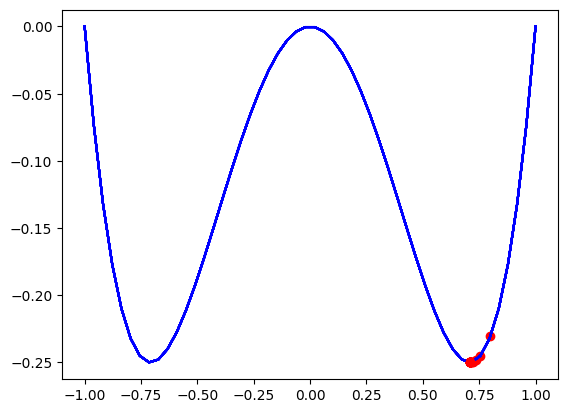

In [19]:
gradient_descent(dev_objective_function, 1.0, 0.1, 20)

Existen multitud de métodos pensados para aquellas funciones que nos permitan calcular los gradientes de una función.

![gif](./img/contours_evaluation_optimizers.gif)

Pero esto no siempre será posible. Y debido a ello, existen métodos libres de gradiente e inspirados en procesos naturales que nos ofrecen una vía alternativa.

https://en.wikipedia.org/wiki/Derivative-free_optimization

Modelos clásicos:

* Powell: https://en.wikipedia.org/wiki/Powell%27s_method

Basados en técnicas de templado:

* Templado simulado: https://en.wikipedia.org/wiki/Simulated_annealing

Basados en la evolución natural:

* Algoritmos evolutivos: https://en.wikipedia.org/wiki/Evolution_strategy


Aquellos que no cuentan con validez matemática se conocen como algoritmos heurísticoss y son en gran medida los empleados en el grueso de actividades relativas al aprendizaje automático o _machine learning_.

### Método de Powell y COBYLA

![powell](./img/powell.gif)

Fuente: https://e2eml.school/evopowell.html

In [16]:
import random
from scipy.optimize import minimize

x0 = random.random()
res = minimize(objective_function, x0=x0, method="Powell")
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.24999999999999994
       x: [-7.071e-01]
     nit: 3
   direc: [[ 1.000e+00]]
    nfev: 38

Referencia: https://handwiki.org/wiki/COBYLA

In [17]:
res = minimize(objective_function, x0=x0, method="COBYLA")
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.2499999661681933
       x: [-7.072e-01]
    nfev: 21
   maxcv: 0.0

### Recocido simulado

Sigue la visión de temperatura asociada a la función objetivo y aplicando las dinámicas que se siguen en el recocido de metalurgia.

![recocido](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)

Referencia: https://webdiis.unizar.es/asignaturas/APD/wp/wp-content/uploads/2013/09/151201simulatedAnnealing2.pdf

In [18]:
from scipy.optimize import dual_annealing

res = dual_annealing(objective_function, bounds=[(-1.0,1.0)])
res

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -0.24999999999999722
       x: [-7.071e-01]
     nit: 1000
    nfev: 2017
    njev: 8
    nhev: 0

### Algoritmos evolutivos

Si ha funcionado con los seres humanos...

![EA](./img/EA.gif)

Fuente: https://en.wikipedia.org/wiki/Evolutionary_algorithm

In [19]:
from scipy.optimize import differential_evolution

res = differential_evolution(objective_function, bounds=[(-1.0,1.0)], strategy="rand2bin", maxiter=100)
res

             message: Optimization terminated successfully.
             success: True
                 fun: -0.25
                   x: [ 7.071e-01]
                 nit: 14
                nfev: 231
          population: [[ 7.074e-01]
                       [ 7.196e-01]
                       ...
                       [-7.278e-01]
                       [ 6.995e-01]]
 population_energies: [-2.500e-01 -2.497e-01 ... -2.491e-01 -2.499e-01]
                 jac: [ 2.776e-08]

In [20]:
for ind, energy in zip(res.population, res.population_energies):
    print(f"Solution {ind}: {energy} value")

Solution [0.70735658]: -0.25 value
Solution [0.71955884]: -0.24968440725248198 value
Solution [-0.73872041]: -0.24791079318674375 value
Solution [0.73672358]: -0.24817144243290867 value
Solution [0.71333831]: -0.24992165022517576 value
Solution [-0.7099751]: -0.24998347873782328 value
Solution [-0.6894271]: -0.24939039057049334 value
Solution [-0.72427871]: -0.24939584080420607 value
Solution [-0.69811373]: -0.249840300724007 value
Solution [-0.72342012]: -0.2494553995360056 value
Solution [-0.69037413]: -0.24945320904126056 value
Solution [0.72369959]: -0.2494363605994388 value
Solution [0.72319366]: -0.2494705828832557 value
Solution [-0.7277508]: -0.24912258273359256 value
Solution [0.69954066]: -0.2498867295664023 value


Referencias:

* https://realpython.com/linear-programming-python/
* https://realpython.com/python-scipy-cluster-optimize/#using-the-optimize-module-in-scipy
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent
* https://www.ruder.io/optimizing-gradient-descent/
* https://openstax.org/books/c%C3%A1lculo-volumen-1/pages/4-introduccion
* https://arxiv.org/pdf/1904.11585